<a href="https://colab.research.google.com/github/peisuke/generative_ai_notebooks/blob/main/Vision/12_02_StableDiffusion_DreamBooth_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Googleドライブのマウント
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
!pip install -r requirements.txt
!pip install --upgrade protobuf
!pip install xformers==0.0.22 triton bitsandbytes omegaconf
!pip install diffusers[torch]==0.21.2

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 11.4 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.21.2-py3-none-any.whl size=1489250 sha256=30cec8704490defdf2c9661c8929c72f2fd77a74dee8c9a67318145f37fb3b6a
  Stored in directory: /root/.cache/pip/wheels/2e/09/32/11c9e42c397d3f3494226b28ba68c4ad4718a68a65dba14ea6
Successfully built diffusers


In [6]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

device = "cuda"

# create pipe
pipe = StableDiffusionPipeline.from_single_file(
    "/content/drive/MyDrive/AI/DB/Model/frog/frog.safetensors", revision="fp16", torch_dtype=torch.float16
)
pipe = pipe.to(device)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

In [14]:
prompt = "shs frog on the table"

# 画像生成
image = pipe(
    prompt,
    generator=torch.Generator("cpu").manual_seed(0),
).images

  0%|          | 0/50 [00:00<?, ?it/s]

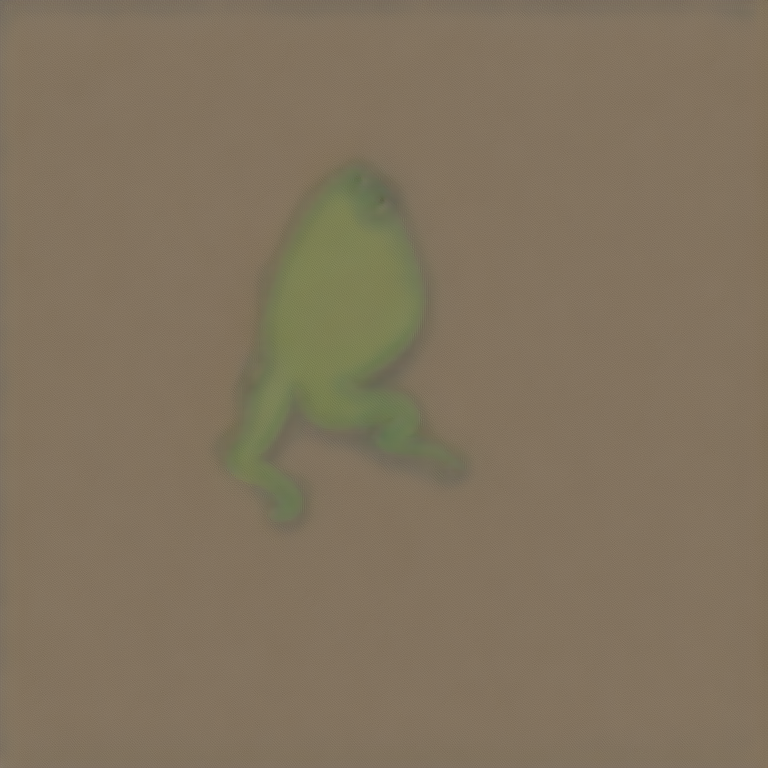

In [15]:
image[0]

In [10]:
prompt = "frog on the table"

# 画像生成
image = pipe(
    prompt,
    generator=torch.Generator("cpu").manual_seed(42),
).images

  0%|          | 0/50 [00:00<?, ?it/s]